# Data Description

- datetime : hourly date + timestamp
- season : 1 봄, 2 여름, 3 가을, 4겨울
- holiday : 1 토, 일요일의 주말을 제외한 휴일, 0 휴일이 아닌 날 
- workingday : 1 주말 및 휴일이 아닌 주중, 0 주말 및 휴일
- weather 
1 맑음, 약간 구름 낀 흐림
2 안개,  안개 + 흐림
3 가벼운 눈, 가벼운 비 + 천둥
4 심한 눈/비, 천둥/번개
- temp : 온도(섭씨)
- atemp : 체감 온도(섭씨)
- humidity : 상대 습도
- windspeed : 풍속
- casual : 사전에 등록되지 않는 사용자가 대여한 횟수
- registered : 사전에 등록된 사용자가 대여한 횟수
- count : 대여 횟수(predict)

# Data prprocessing

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
os.listdir('./data/bike_sharing')

['train.csv', 'test.csv']

In [6]:
train = pd.read_csv('./data/bike_sharing/train.csv')
test = pd.read_csv('./data/bike_sharing/test.csv')

print('train shape : ', train.shape)
print('test shape : ', test.shape)

train shape :  (10886, 12)
test shape :  (6493, 9)


In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [12]:
train['datetime'] = train['datetime'].apply(pd.to_datetime)

train['year'] = train['datetime'].apply(lambda x : x.year)
train['month'] = train['datetime'].apply(lambda x : x.month)
train['day'] = train['datetime'].apply(lambda x : x.day)
train['hour'] = train['datetime'].apply(lambda x : x.hour)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [16]:
train.drop(['datetime','casual','registered'], axis=1, inplace = True)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [31]:
from sklearn.metrics import mean_squared_error

def evaluate_reg(y, pred) :
    def rmsle(y,pred) :

        log_y = np.log1p(y)
        log_pred = np.log1p(pred)

        rmsle = np.sqrt(np.mean((log_y - log_pred) ** 2))

        return rmsle

    def rmse(y, pred) :
        return np.sqrt(mean_squared_error(y, pred))
    
    print('RMSLE : {0:.4f}, RMSE : {1:.4f}'.format(rmsle(y,pred), rmse(y,pred)))

# linear regression

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

y_target = train['count']
X_features = train.drop(['count'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, random_state = 0)

In [33]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

evaluate_reg(y_test, pred)

RMSLE : 1.1647, RMSE : 140.8996


## compare with true_value

In [35]:
def get_top_error_data(y_test, pred, n_tops = 5) :
    
    result = pd.DataFrame(y_test.values, columns = ['real_count'])
    result['predicted_count'] = np.round(pred)
    result['diff'] = np.abs(result['real_count'] - result['predicted_count'])
    
    #차이가 큰 것들부터
    print(result.sort_values('diff', ascending = False)[:n_tops])
    
get_top_error_data(y_test, pred, n_tops = 10)

      real_count  predicted_count   diff
1618         890            322.0  568.0
3151         798            241.0  557.0
966          884            327.0  557.0
412          745            194.0  551.0
2817         856            310.0  546.0
2277         813            267.0  546.0
2314         766            222.0  544.0
454          721            177.0  544.0
1003         713            171.0  542.0
2394         684            142.0  542.0


## target distribution

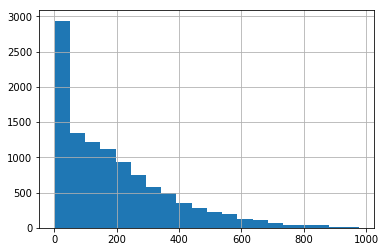

In [37]:
y_target.hist(bins = 20)

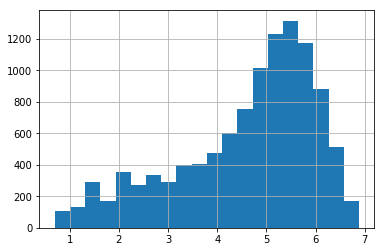

In [38]:
y_target_log = np.log1p(y_target)
y_target_log.hist(bins = 20)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size = 0.3, random_state = 0)

lr.fit(X_train, y_train)
pred = lr.predict(X_test)

y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)

evaluate_reg(y_test_exp, pred_exp)

RMSLE : 1.0168, RMSE : 162.5943


RMSLE 값은 줄었지만, RMSE값은 오히려 늘었다

## coefficient plot

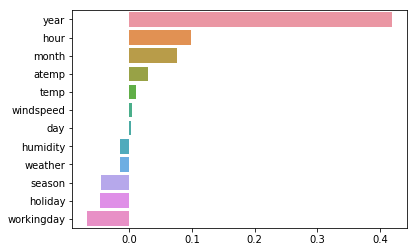

In [41]:
coef = pd.Series(lr.coef_, index = X_features.columns).sort_values(ascending=False)
sns.barplot(coef, coef.index)

- 왜 이렇게 year변수의 계수가 크게 나타날까? year값들은 2011,2012 두 값뿐이지만, 각각의 숫자가 크기가 너무 커서 계수 역시 크다. 따라서 one-hot encoding!

## one-hot encoding

In [75]:
X_features_one_hot = pd.get_dummies(X_features, columns = ['year','month','holiday','workingday','hour','season','weather'
                                                          ])
X_features_one_hot.head()

,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,month_3,...,hour_22,hour_23,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,9.02,13.635,80,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,9.02,13.635,80,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,9.84,14.395,75,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,9.84,14.395,75,0.0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [76]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1 = False) :
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
        
    print('###', model.__class__.__name__,'###')
    evaluate_reg(y_test, pred)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_features_one_hot, y_target_log, test_size = 0.3, random_state = 0)

In [78]:
lr = LinearRegression()
ridge = Ridge(alpha = 10)
lasso = Lasso(alpha = 0.01)

for model in [lr, ridge, lasso] :
    get_model_predict(model, X_train, X_test, y_train ,y_test, True)

### LinearRegression ###
RMSLE : 0.5889, RMSE : 97.4832
### Ridge ###
RMSLE : 0.5895, RMSE : 98.4069
### Lasso ###
RMSLE : 0.6344, RMSE : 113.0308


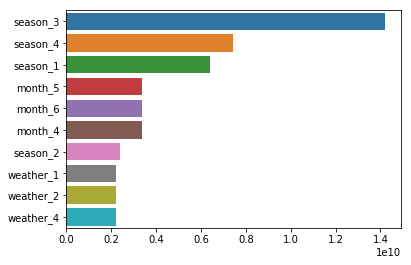

In [79]:
coef = pd.Series(lr.coef_, index = X_features_one_hot.columns).sort_values(ascending = False)[:10]
sns.barplot(coef, coef.index)

# tree regression

In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

rf = RandomForestRegressor(n_estimators=500, n_jobs = -1)
gbm = GradientBoostingRegressor(n_estimators=500)
xgb = XGBRegressor(n_estimators=500, n_jobs=-1)
lgb = LGBMRegressor(n_estimators=500, n_jobs = -1)

for model in [rf, gbm, xgb, lgb] :
    get_model_predict(model, X_train, X_test, y_train ,y_test, True)

### RandomForestRegressor ###
RMSLE : 0.3535, RMSE : 50.9387
### GradientBoostingRegressor ###
RMSLE : 0.3404, RMSE : 55.7615
### XGBRegressor ###
RMSLE : 0.3456, RMSE : 56.4742
### LGBMRegressor ###
RMSLE : 0.3158, RMSE : 46.4733


# test

In [86]:
test = pd.read_csv('./data/bike_sharing/test.csv')
test['datetime'] = test['datetime'].apply(pd.to_datetime)

test['year'] = test['datetime'].apply(lambda x : x.year)
test['month'] = test['datetime'].apply(lambda x : x.month)
test['day'] = test['datetime'].apply(lambda x : x.day)
test['hour'] = test['datetime'].apply(lambda x : x.hour)

test = pd.get_dummies(test, columns = ['year','month','holiday','workingday','hour','season','weather'])

test.head()

,datetime,temp,atemp,humidity,windspeed,day,year_2011,year_2012,month_1,month_2,...,hour_22,hour_23,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,10.66,11.365,56,26.0027,20,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,10.66,13.635,56,0.0000,20,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,10.66,13.635,56,0.0000,20,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,10.66,12.880,56,11.0014,20,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,10.66,12.880,56,11.0014,20,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [92]:
def test_sub(model, testset) :
    pred = model.predict(testset.drop('datetime', axis = 1))
    res = pd.DataFrame({'datetime' : testset.datetime, 'count' : pred})
    df_name = model.__class__.__name__ + '_bike_190414.csv'
    res.to_csv(df_name, index = False)